# Influence early access asteroid visualizations

This is a simple notebook showcasing some interesting statistics for the asteroids available in the Influence game.
We'll inspect the owned asteroid group, the unowned one and the full group.

Data courtesy of [adalia.info](https://drive.google.com/file/d/1EhYDDp09UVM4WhpfcPpyXBTe8eU3syho/view). Deposit json
file in root directory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('2021-09-05-adalia-info-asteroids.json', lines=True)


## Early access vs the rest
Comparing the entirety of the asteroids with what was bought during the early access sale

In [2]:
# Inspect initial shape of dataframe
print(f'Rows/Columns: {df.shape}')
print(df.isnull().sum())

Rows/Columns: (250000, 17)
_id                    0
id                     0
baseName               0
bonuses                0
eccentricity           0
estimatedPrice      1860
inclination            0
name                   0
orbitalPeriod          0
owner             248140
radius                 0
rarity            248633
scanned                0
semiMajorAxis          0
size                   0
spectralType           0
surfaceArea            0
dtype: int64


In [3]:
# Split asteroids based on ownership status
unowned_df, owned_df = df[df['owner'].isnull()], df[df['owner'].notnull()]
print(unowned_df.shape, owned_df.shape)

(248140, 17) (1860, 17)


We can see that at the early access sale, 1860 asteroids have been sold already, a mere fraction of the total supply of
asteroids.

<AxesSubplot:title={'center':'Asteroids spectral type distribution'}>

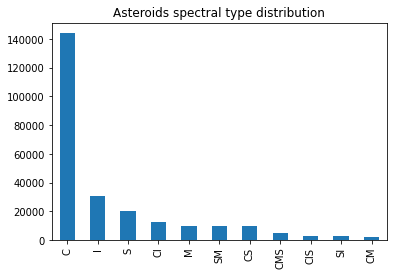

In [4]:
# Illustrate spectral type distribution
df['spectralType'].value_counts().plot(kind='bar', title="Asteroids spectral type distribution")

Clear from this barchart is that there is an overwhelming majority of C type asteroids, this is already known though if
you ever read the [wiki page](https://wiki.influenceth.io/en/gameplay/spectral-types) on spectral types. But what about
the currently sold asteroids?

<AxesSubplot:title={'center':'Owned asteroids spectral type distribution'}>

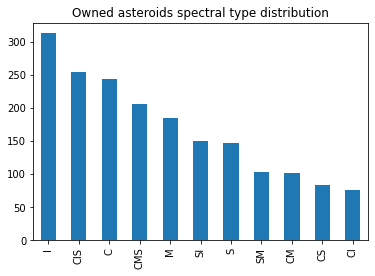

In [5]:
# Illustrate spectral type distribution
owned_df['spectralType'].value_counts().plot(kind='bar', title="Owned asteroids spectral type distribution")

Now this chart shows that the early access investors have a large preference for the pure types and the triple types,
with few being interested in the double types. Specifically I types are very hot!


Text(0.5, 1.0, 'Asteroid sizes')

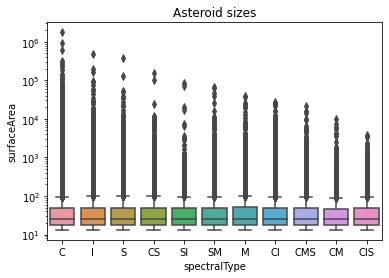

In [6]:
# Illustrate size distribution
ax = sns.boxplot(x="spectralType", y="surfaceArea", data=df)
ax.set_yscale("log")
plt.title('Asteroid sizes')

In this collection of boxplots from all asteroids, we can notice a few things. First, all asteroids types seem to
follow something *close* to a normal distribution, although not quite, seeing as the Median-Q3 area is a bit larger
than the Q1-Median area. Furthermore, it seems that all spectral types are roughly consistent in this distribution.
Lastly, the outliers. There are no lower outliers in size, something around ~13Km2 is the minimum, but there are a
good amount of higher outliers. All the outliers also seem to gradually grow more concentrated over different types,
although this doesn't seem to relate much to positioning, seeing as both C and I types have the highest outlier spread.
If you can figure out the pattern let me know!

Text(0.5, 1.0, 'Owned asteroid sizes')

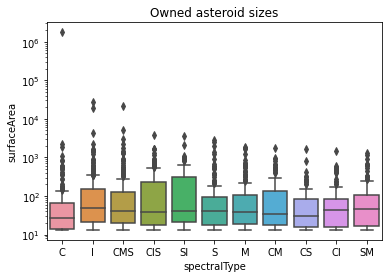

In [7]:
# Illustrate size distribution
ax = sns.boxplot(x="spectralType", y="surfaceArea", data=owned_df)
ax.set_yscale("log")
plt.title('Owned asteroid sizes')

Text(0.5, 1.0, 'Owned asteroid sizes (HUGE removed)')

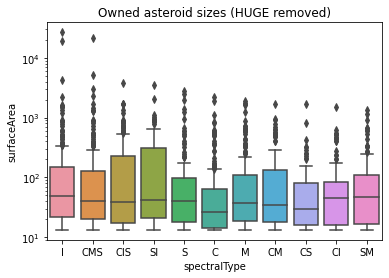

In [8]:
temp_df = owned_df[owned_df['size'] != 'HUGE']
# Illustrate size distribution
ax = sns.boxplot(x="spectralType", y="surfaceArea", data=temp_df)
ax.set_yscale("log")
plt.title('Owned asteroid sizes (HUGE removed)')


In the owned asteroid side of things, people mostly seem to pick the same amount of asteroids regarding surface area.
The few exceptions is that generally smaller C types were chosen, and for the larger CIS and SI types. I and CMS types
generally appear to have been chosen for the larger asteroids.

## Pricing
Estimate pricing of the asteroids

Most of the asteroids are small, with medium coming in second, and large and huge being very low in supply. Players
purchased EA asteroids in mostly the same distribution, which makes sense seeing as the large and huge asteroids are
very pricey. How pricey you ask?

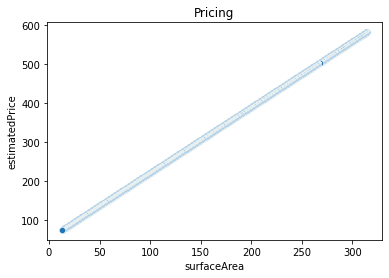

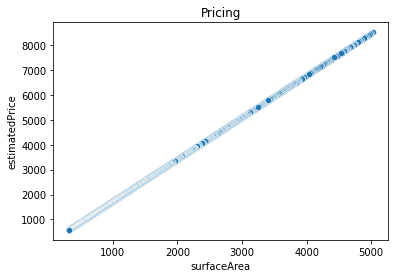

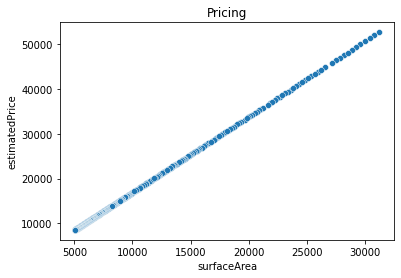

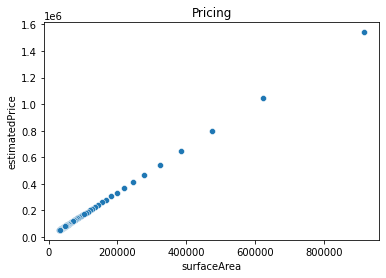

In [9]:
#  Illustrate size distribution
unowned_df_by_size = reversed([d for _, d in unowned_df.groupby(['size'])])
for i in unowned_df_by_size:
    sns.scatterplot(x=i['surfaceArea'], y=i['estimatedPrice'])
    plt.title('Pricing')
    plt.show()

The answer is very pricey, the huge asteroids have costs ranging in the hundreds of thousands. Additionally, you can
see that the price and size increase linearly, which shouldn't be a surprise


## Asteroid positioning
Related to the orbit of the asteroids

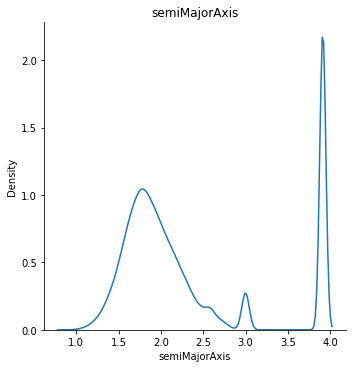

In [10]:
# Inspect semi major axis distribution (AU)
sns.displot(df, x='semiMajorAxis', kind='kde', bw_adjust=.5)
plt.title('semiMajorAxis')
plt.show()

Inspecting the semi major axis distribution, we can see there are 3 distinct groups in the Adalia system.
A large and spread out group of asteroids in the main belt, a smaller group near the main group, and then a very
large but highly concentrated groups in the outer belt.

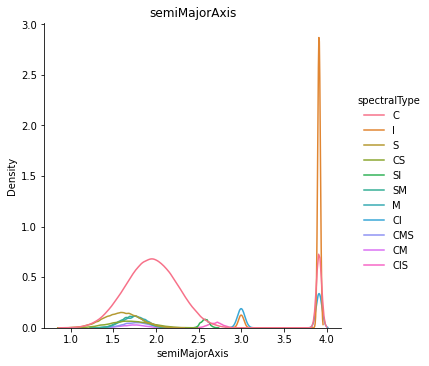

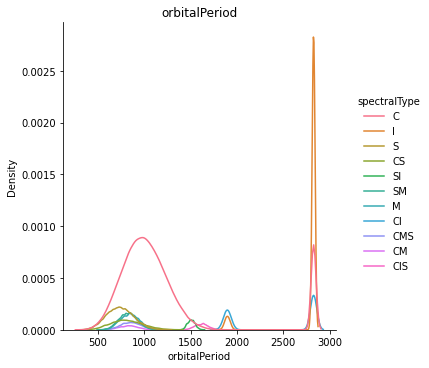

In [11]:
# Inspect semi major axis distribution (AU)
sns.displot(df, x='semiMajorAxis', kind='kde', bw_adjust=.5, hue='spectralType')
plt.title('semiMajorAxis')
plt.show()

# Inspect semi major axis distribution (AU)
sns.displot(df, x='orbitalPeriod', kind='kde', bw_adjust=.5, hue='spectralType')
plt.title('orbitalPeriod')
plt.show()

Distinguishing this chart with the spectral types shows a chart similar to the one on the wiki, no new information
here. I was also curious if orbital period would result in the same chart, and perhaps unsurprisingly the answer is
yes. This implies that they have a high correlation, which we'll check out below.

<AxesSubplot:>

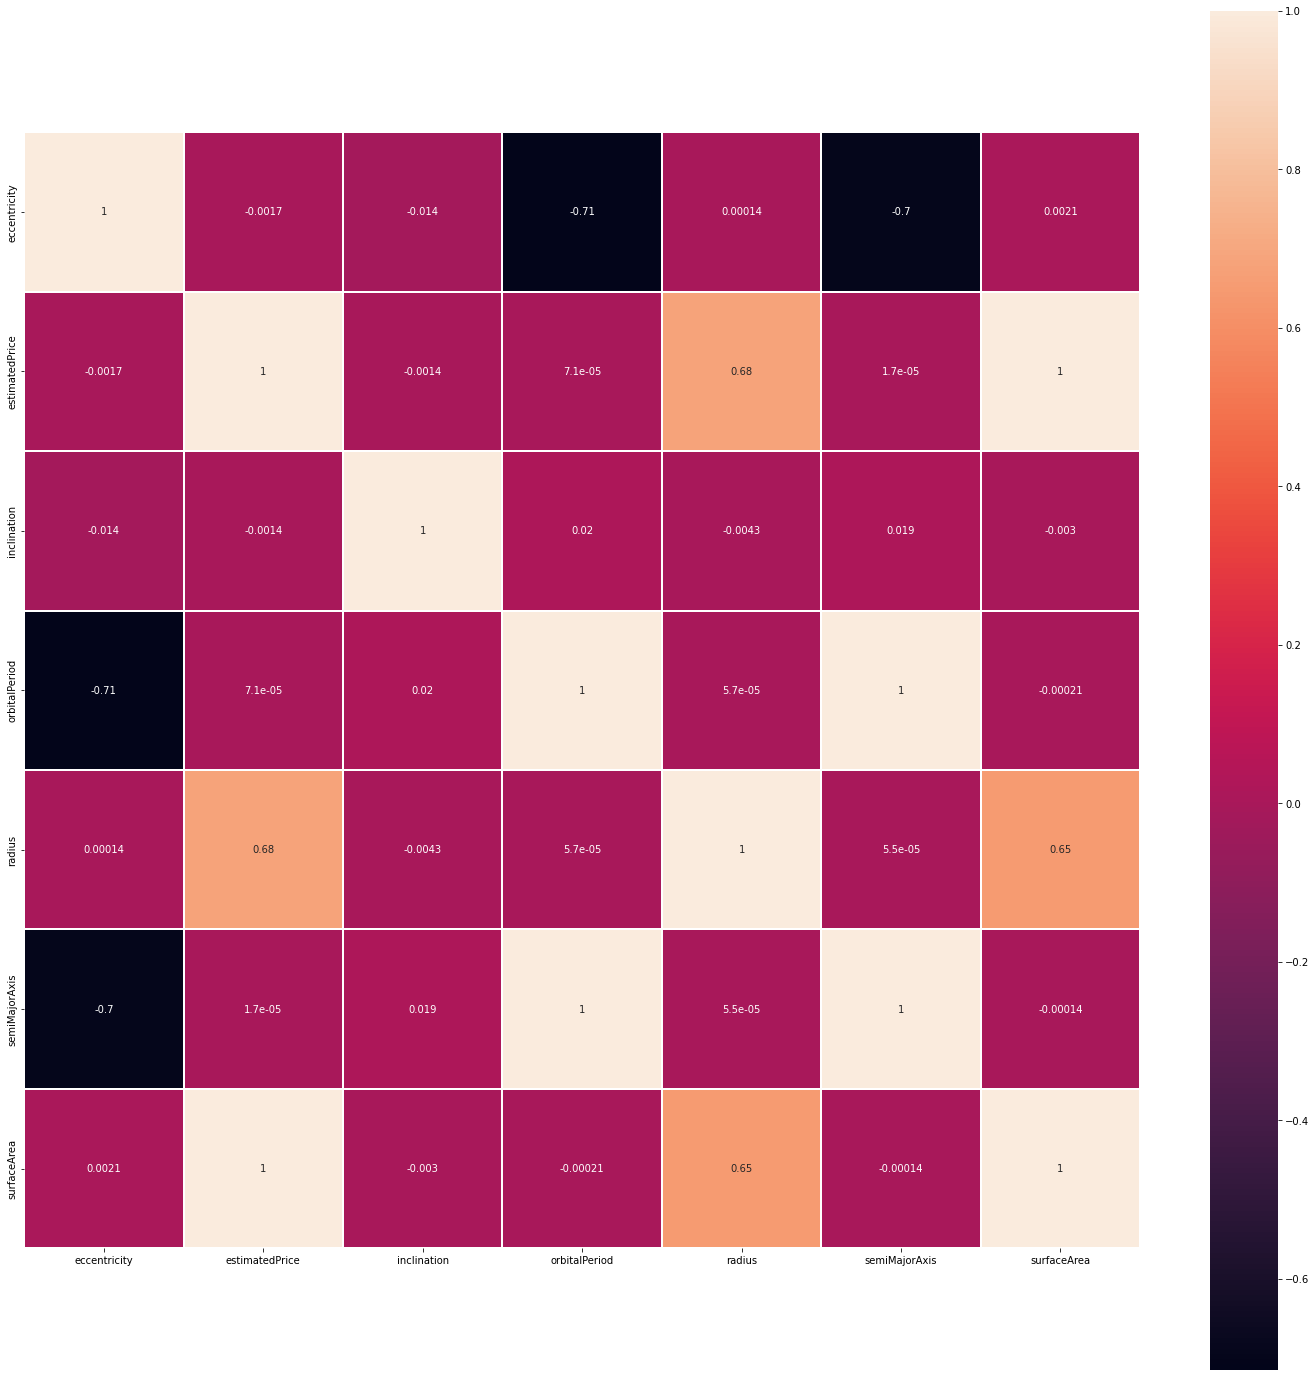

In [12]:
# Correlation matrix of the asteroid variables
temp_df = df.copy()
temp_df = temp_df.drop(['id', 'scanned'], axis=1)
plt.figure(figsize=(25, 25))
sns.heatmap(temp_df.corr(), annot=True, square=True, linewidths=2)

And just as we implied above, there's a 1 on 1 correlation as we predicted between the variables.

1 interesting find though is that there's quite a strong negative correlation between eccentricity and orbital period.
The higher the eccentricity, the closer it is to the center of the system. Apart from that though there's not much
interesting here.

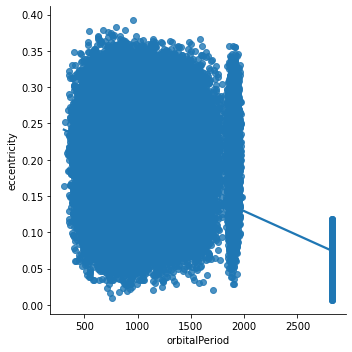

In [13]:
# Inspect eccentricity and orbital period
sns.lmplot(x='orbitalPeriod', y='eccentricity', data=df)

Now this chart above may look a bit weird, i thought we mentioned there was a negative correlation? Then why is there
such a huge blob? Well, there is: see  the small downtrending line on the bottom right. Remember that it wasn't a
full correlation, but 0.7, And this is because we have a ton of outliers for eccentricity within the main and outer 
belt.

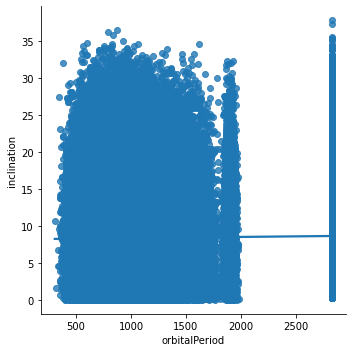

In [14]:
# Inspect eccentricity and orbital period
sns.lmplot(x='orbitalPeriod', y='inclination', data=df)

In this plot we can see that there's a very light positive correlation between orbital period and inclination. The
difference between the belt sections is interesting to look at.

<AxesSubplot:xlabel='eccentricity', ylabel='inclination'>

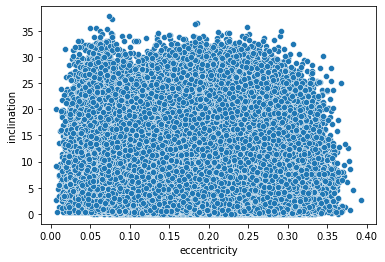

In [15]:
sns.scatterplot(x=df['eccentricity'], y=df['inclination'])

The relation between eccentricity and inclination is fully random, no connection here.